# Índices

Esse notebook apresenta um simples exemplo de índices em uma tabela de um banco de dados relacional.
Usou-se o sqlite3 pela sua praticidade de disponibilizar um banco em memória

## Bibliotecas necessárias

In [1]:
import sqlite3
import time
from faker import Faker
from faker_vehicle import VehicleProvider
import matplotlib.pyplot as plt
import numpy as np

- Criar cenários de teste com escala de 10 em quantidade de registros
- Criar métodos simples para facilitar
- Criar resultados

## Conexão com o banco e criação da tabela

In [2]:
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS vehicles")
table = """CREATE TABLE vehicles(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name VARCHAR(255) NOT NULL,
    make VARCHAR(255) NOT NULL,
    model VARCHAR(255) NOT NULL,
    year TINYINT(4) NOT NULL,
    category VARCHAR(255) NOT NULL,
    price DECIMAL(10, 2)
);
"""

cursor.execute(table)

## Métodos relacionados a tabela do banco

In [3]:
fake = Faker()
fake.add_provider(VehicleProvider)

def seed_vehicles(size):
    for _ in range(0, size):
        vehicle = fake.machine_object()
        input = (
            "{} {} ({})".format(vehicle['Make'], vehicle['Model'], vehicle['Year']), 
            vehicle['Make'], 
            vehicle['Model'], 
            vehicle['Year'], 
            vehicle['Category']
        )
        cursor.execute("""
            INSERT INTO vehicles(name, make, model, year, category) VALUES(?, ?, ?, ?, ?)
        """, input
        )
    conn.commit()

def clear_tables():
    cursor.execute("""
        DELETE FROM vehicles
    """)
    conn.commit()

def drop_indexes():
    cursor.execute("DROP INDEX IF EXISTS vehicles_make_model_year_idx")
    cursor.execute("DROP INDEX IF EXISTS vehicles_category_idx")
    cursor.execute("DROP INDEX IF EXISTS vehicles_make_idx")
    cursor.execute("DROP INDEX IF EXISTS vehicles_model_idx")
    cursor.execute("DROP INDEX IF EXISTS vehicles_year_idx")
    
def create_indexes():
    cursor.execute("CREATE INDEX vehicles_make_model_year_idx ON vehicles(make, model, year)")
    cursor.execute("CREATE INDEX vehicles_category_idx ON vehicles(category)")
    cursor.execute("CREATE INDEX vehicles_make_idx ON vehicles(make)")
    cursor.execute("CREATE INDEX vehicles_model_idx ON vehicles(model)")
    cursor.execute("CREATE INDEX vehicles_year_idx ON vehicles(year)")

def run_query(sql):
    start = time.time()

    res = cursor.execute(sql)
    res.fetchall()

    end = time.time()
    duration = str((end - start) * 1000)

    return duration

## Coleta de dados para experimentos

In [9]:
def run(size): 
    print("running {} size".format(size))
    clear_tables()
    seed_vehicles(size)
    query = "SELECT name, price FROM vehicles WHERE year = 2015"

    drop_indexes()
    non_indexed_duration = run_query(query)

    create_indexes()
    indexed_duration = run_query(query)

    print("finished {} size".format(size))
    return {
        'indexed': indexed_duration,
        'non_indexed': non_indexed_duration
    }

data = {}

data[10] = run(10)
data[100] = run(100)
data[1000] = run(1000)
data[10000] = run(10000)
data[100000] = run(100000)
data[1000000] = run(1000000)
data[10000000] = run(10000000)

running 10 size
finished 10 size
running 100 size
finished 100 size
running 1000 size
finished 1000 size
running 10000 size
finished 10000 size
running 100000 size
finished 100000 size
running 1000000 size
finished 1000000 size
running 10000000 size
finished 10000000 size


## Resultados

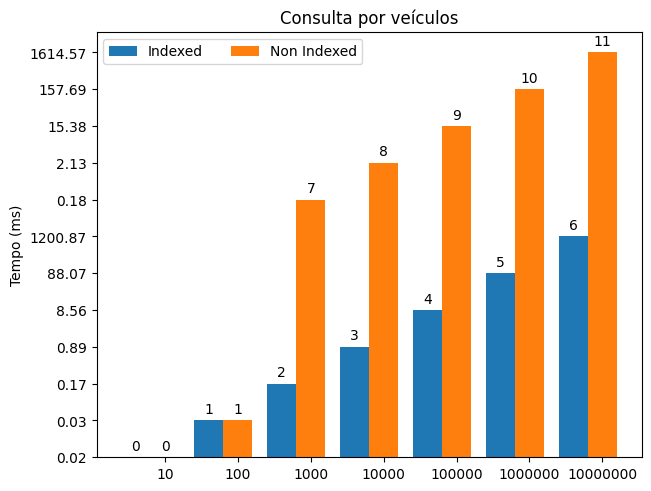

In [33]:
sample_sizes = data.keys()
indexed_values = []
non_indexed_values = []
vals = data.values()
for val in vals:
    indexed_values.append('%.2f' % float(val['indexed']))
    non_indexed_values.append('%.2f' % float(val['non_indexed']))

execution_times = {
    'Indexed': indexed_values,
    'Non Indexed': non_indexed_values
}

x = np.arange(len(sample_sizes))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in execution_times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Tempo (ms)')
ax.set_title('Consulta por veículos')
ax.set_xticks(x + width, sample_sizes)
ax.legend(loc='upper left', ncols=3)

plt.show()

In [28]:
'%.4f' % float('0.17094612')

'0.1709'